# Solution Optimization Analysis

In [247]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Load Datasets

In [248]:
raw_textgrad = pd.read_csv("results/raw_textgrad.csv")
raw_textgrad

,id,raw_solution,correct_answer,source,subject,solution_1,solution_2,solution_3,solution_4,solution_5
0,3,The given state is $|\psi\rangle = 0.5|\uparro...,B,GPQA-Diamond,-,The given state is $|\psi\rangle = 0.5|\uparro...,The given state is $|\psi\rangle = 0.5|\uparro...,The given state is $|\psi\rangle = 0.5|\uparro...,The given state is $|\psi\rangle = 0.5|\uparro...,The given state is $|\psi\rangle = 0.5|\uparro...
1,2,Here's how we can determine the number of carb...,B,GPQA-Diamond,-,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...
2,4,Maxwell's equations in our universe are:\n\n1....,A,GPQA-Diamond,-,Maxwell's equations in our universe are:\n\n1....,Maxwell's equations in our universe are:\n\n1....,"If magnetic monopoles exist, Gauss's law for m...","If magnetic monopoles exist, Gauss's law for m...","If magnetic monopoles exist, Gauss's law for m..."
3,6,"The potential is given by:\nV(r, θ) = (1/2)kr^...",B,GPQA-Diamond,-,"The potential is given by:\nV(r, θ) = (1/2)kr^...","The potential is given by:\nV(r, θ) = (1/2)kr^...","The potential is given by:\nV(r, θ) = (1/2)kr^...","The potential is given by:\nV(r, θ) = (1/2)kr^...","The potential is given by:\nV(r, θ) = (1/2)kr^..."
4,1,The energy-time uncertainty principle states t...,C,GPQA-Diamond,-,The energy-time uncertainty principle states t...,The energy-time uncertainty principle states t...,To distinguish two energy levels E1 and E2 wit...,For two energy levels to be clearly distinguis...,For two energy levels to be clearly distinguis...
5,9,Let's analyze the symmetry of each molecule:\n...,D,GPQA-Diamond,-,Let's analyze the symmetry of each molecule:\n...,Let's analyze the symmetry of each molecule:\n...,Let's analyze the symmetry of each molecule:\n...,Let's analyze the symmetry of each molecule:\n...,Let's analyze the symmetry of each molecule:\n...
6,10,We need to determine which planet has the high...,C,GPQA-Diamond,-,We need to determine which planet has the high...,We need to determine which planet has the high...,"Let $\rho$ be the density, $M$ be the mass, an...","Let $\rho$ be the density, $M$ be the mass, an...","Let $\rho$ be the density, $M$ be the mass, an..."
7,7,The process described is $\gamma\gamma\rightar...,C,GPQA-Diamond,-,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...
8,5,Here's how we can find the eigenvector:\n\n1. ...,A,GPQA-Diamond,-,Here's how we can find the eigenvector:\n\n1. ...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...
9,8,Here's how we can analyze the results and dete...,B,GPQA-Diamond,-,Here's how we can analyze the results and dete...,Here's how we can analyze the results and dete...,"1. **G2's Essential Role:** The g2 mutant, and...","1. **G2's Essential Role:** The g2 mutant, and...","1. **G2's Essential Role:** The g2 mutant, and..."


In [249]:
tv_textgrad = pd.read_csv("results/tv_textgrad.csv")
tv_textgrad

,id,raw_solution,correct_answer,source,subject,solution_1,solution_2,solution_3,solution_4,solution_5
0,2,Here's how we can determine the number of carb...,B,GPQA-Diamond,-,1. **Reaction 1: Grignard Addition**\n - *Re...,1. **Reaction 1: Grignard Addition**\n - *Re...,| Reactant | Reaction | Change in Carbon Count...,1. **trans-Cinnamaldehyde (C9H8O) + Methylmagn...,1. **trans-Cinnamaldehyde (C9H8O) + Methylmagn...
1,3,The given state is $|\psi\rangle = 0.5|\uparro...,B,GPQA-Diamond,-,The given state is $|\psi\rangle = 0.5|\uparro...,Let $|\psi\rangle = a|\uparrow\rangle + b|\dow...,Let $|\psi\rangle = a|\uparrow\rangle + b|\dow...,Step 1: Define the operator and state vector:\...,Step 1: Define the operator and state vector:\...
2,1,The energy-time uncertainty principle states t...,C,GPQA-Diamond,-,"To distinguish between two energy levels, thei...",The energy-time uncertainty principle states t...,"To resolve two energy levels, their energy dif...","To resolve two energy levels, their energy dif...","To resolve two energy levels, their energy dif..."
3,7,The process described is $\gamma\gamma\rightar...,C,GPQA-Diamond,-,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...,The process described is $\gamma\gamma\rightar...
4,6,"The potential is given by:\nV(r, θ) = (1/2)kr^...",B,GPQA-Diamond,-,"The potential is given by:\nV(r, θ) = (1/2)kr^...","The potential is given by:\nV(r, θ) = (1/2)kr^...",**1. Converting to Cartesian Coordinates:**\nG...,**1. Converting to Cartesian Coordinates:**\nG...,**1. Converting to Cartesian Coordinates:**\nG...
5,10,We need to determine which planet has the high...,C,GPQA-Diamond,-,We are looking for the planet with the highest...,Let's analyze the density of each exoplanet:\n...,"Let's analyze the density of each exoplanet, c...",Let's analyze the density of each exoplanet us...,"Let's analyze the density of each exoplanet, c..."
6,4,Maxwell's equations in our universe are:\n\n1....,A,GPQA-Diamond,-,"In our universe, Maxwell's equations are:\n\n1...",The presence of magnetic monopoles introduces ...,"In a universe with magnetic monopoles, Maxwell...",Here's a step-by-step analysis of how Maxwell'...,"In a universe with magnetic monopoles, Maxwell..."
7,5,Here's how we can find the eigenvector:\n\n1. ...,A,GPQA-Diamond,-,Here's how we can find the eigenvector:\n\n1. ...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...,Here's how we find the eigenvector:\n\n1. **De...
8,8,Here's how we can analyze the results and dete...,B,GPQA-Diamond,-,Here's how we can analyze the results:\n\n1. *...,"Let's analyze the data systematically, conside...","Let's analyze the data, explicitly defining a ...","Let's analyze the data, defining a baseline re...","Let's analyze the data, starting with a baseli..."
9,9,Let's analyze the symmetry of each molecule:\n...,D,GPQA-Diamond,-,Let's analyze the symmetry of each molecule sy...,Let's analyze the symmetry of each molecule sy...,Let's analyze the symmetry of each molecule sy...,Let's analyze the symmetry of each molecule sy...,Let's analyze the symmetry of each molecule sy...


## Functions

In [250]:
def extract_answer(text):
    # Now extract correctly
    match = re.search(r"(?i)Answer\s*:\s*([A-D])", text, re.IGNORECASE)
    if match:
        return match.group(1).upper()
    return "Z" # Z -> means for None (Incorrect Answer)

In [251]:
def process_answer(row_data):
    data = {
        "correct_answer": row_data["correct_answer"],
        "initial_answer": extract_answer(row_data["raw_solution"]),
        "solution_answer_1": extract_answer(row_data["solution_1"]),
        "solution_answer_2": extract_answer(row_data["solution_2"]),
        "solution_answer_3": extract_answer(row_data["solution_3"]),
        "solution_answer_4": extract_answer(row_data["solution_4"]),
        "final_answer": extract_answer(row_data["solution_5"])
    }
    # Get zero-shot & final result
    data["zero_shot_result"] = data["correct_answer"] == data["initial_answer"]
    data["final_result"] = data["correct_answer"] == data["final_answer"]

    # Majority voting among solution_1 to solution_5
    voted_answers = [
        data["solution_answer_1"],
        data["solution_answer_2"],
        data["solution_answer_3"],
        data["solution_answer_4"],
        data["final_answer"]
    ]
    
    # Filter out None values
    voted_answers = [a for a in voted_answers if a is not None]

    # Get majority answer
    if voted_answers:
        majority_vote = Counter(voted_answers).most_common(1)[0][0]
    else:
        majority_vote = None

    data["majority_answer"] = majority_vote
    data["majority_result"] = data["correct_answer"] == majority_vote

    return data


In [252]:
def process_result_data(result_df):
    processed_answer = []
    for index, row in result_df.iterrows():
        processed_answer.append(process_answer(row))
    return processed_answer

In [253]:
def calculate_true_percentages(df, columns):
    result = {}
    for col in columns:
        if col not in df.columns:
            result[col] = None  # or raise error
            continue
        non_null_count = df[col].notnull().sum()
        if non_null_count == 0:
            result[col] = None  # or 0, or whatever you prefer for empty data
            continue
        true_count = df[col].sum()
        result[col] = round((true_count / non_null_count) * 100, 2)
    return result

In [254]:
def get_clean_processed_data(dataset):
    processed_answer_list = process_result_data(dataset)
    processed_answer = pd.DataFrame(processed_answer_list)
    clean_processed_answer = processed_answer.dropna()
    return clean_processed_answer

def analyze_percentage_data(dataset):
    columns_to_check = ["zero_shot_result", "final_result", "majority_result"]
    clean_processed_answer = get_clean_processed_data(dataset)
    result = calculate_true_percentages(clean_processed_answer, columns_to_check)
    return result

def analyze_visual_iteration_data(dataset):
    iterations = ["initial_answer", "solution_answer_1", "solution_answer_2", "solution_answer_3", "solution_answer_4", "final_answer"]
    accuracies = []
    clean_processed_answer = get_clean_processed_data(dataset)
    
    for col in iterations:
        correct = clean_processed_answer[col] == clean_processed_answer["correct_answer"]
        accuracy = correct.mean() * 100  # Convert to percentage
        accuracies.append(accuracy)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, accuracies, marker='o')
    plt.title("Accuracy at Each Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


## 1. Analysis Raw TextGrad

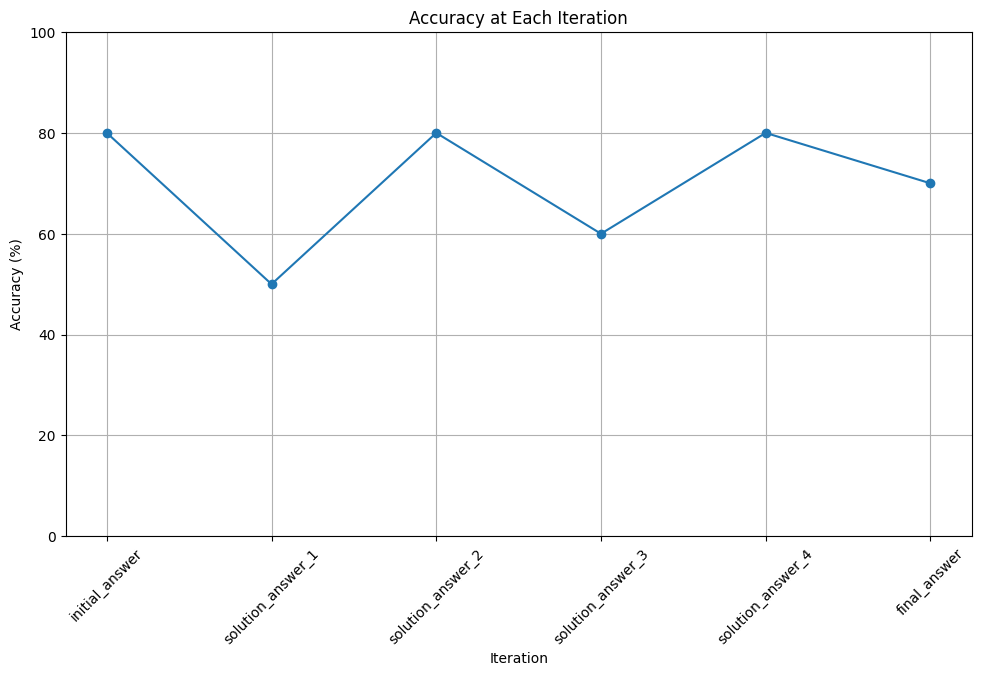

In [255]:
# Visualization
analyze_visual_iteration_data(raw_textgrad)

In [256]:
# Percentages
result = analyze_percentage_data(raw_textgrad)
result

{'zero_shot_result': np.float64(80.0),
 'final_result': np.float64(70.0),
 'majority_result': np.float64(70.0)}

## 2. Analysis TextGrad with TextualVerifier

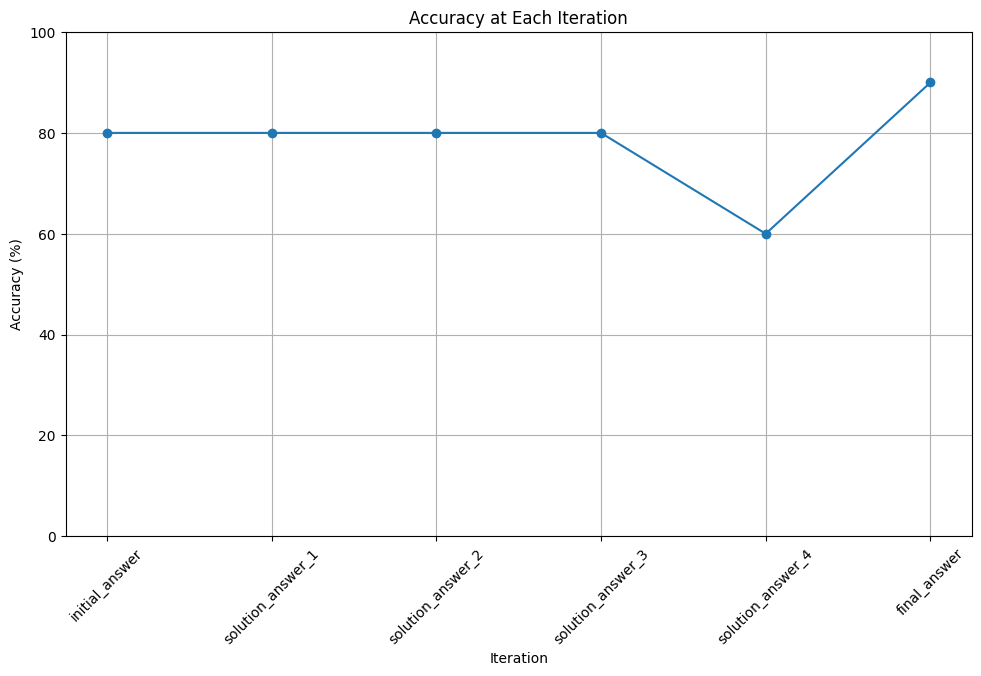

In [257]:
# Visualization
analyze_visual_iteration_data(tv_textgrad)

In [258]:
# Percentages
tv_result = analyze_percentage_data(tv_textgrad)
tv_result

{'zero_shot_result': np.float64(80.0),
 'final_result': np.float64(90.0),
 'majority_result': np.float64(90.0)}